##  Gonna Predict the price of used electronics .
- This is a task from **machinehack**
- Below is my implimentation i tried to do the prediction. 

## Owner.. stephen kamau
 - Email **stiveckamash@gmail.com**
 - phone **0798355947**
 
 
 - Feel free to modify and compaire the scores

# prediction of used electronics by machine hack..
### link ...    -Thsi is the link for the task
- https://www.machinehack.com/hackathons/used_electronics_price_prediction_weekend_hackathon_7

In [118]:
# import libs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
# read data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sub = pd.read_excel("sub.xlsx")

In [120]:
#review them
sub.head()

,Price
0,21773.398095
1,21277.682833
2,64172.642738
3,24174.489232
4,16453.462895


In [121]:
test.head()

,Brand,Model_Info,Additional_Description,Locality,City,State
0,1,name0 55s66s66s778xxsxsmax etc,good condition 11months old single scratch we...,570,11,4
1,1,slightly used excellent condition name0 5 sale,101008700 1010030600 1010034300 10100192200 1...,762,8,2
2,1,name0 sx ios12 top letast model bill call,1010017300 delivery,60,13,5
3,1,name87 name0 x 64gb going lowest 41900,phone 1010023400 64 gb excellent condition sale,640,15,5
4,1,name0 5s proper condition one handedly used,full kit available 10100248300 condition 4gb ...,816,2,6


In [122]:
train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499


In [123]:
#lets use wordclowd to see common words
# !pip install wordcloud

In [124]:
# nlp libs
import sys
sys.path.append('/usr/local/lib/python3.7/dist-packages')
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer

### I will used wordcloud to see some common wordss from the df

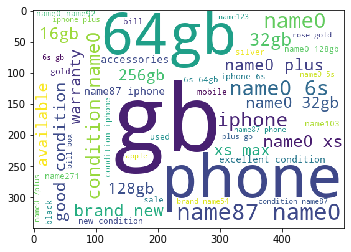

In [125]:
# help(WordCloud)
wl = WordCloud(background_color = 'white' ,min_font_size = 4 , margin = 2 ,ranks_only = None ,normalize_plurals = True ,
         width = 500 , height = 350 , max_words = 50 , stopwords =  set(STOPWORDS ), random_state = 42)
wl.generate(' '.join(train['Model_Info']))
plt.imshow(wl)

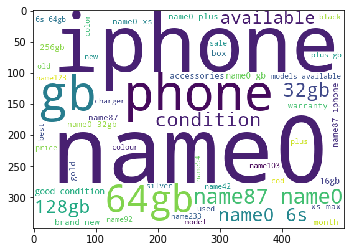

In [126]:
wl = WordCloud(background_color = 'white' ,min_font_size = 4 , margin = 2 ,ranks_only = None ,normalize_plurals = True ,
         width = 500 , height = 350 , max_words = 50 , stopwords =  set(STOPWORDS ), random_state = 42)
wl.generate(' '.join(test['Model_Info']))
plt.imshow(wl)

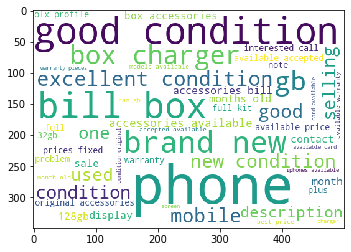

In [127]:
wl = WordCloud(background_color = 'white' ,min_font_size = 4 , margin = 2 ,ranks_only = None ,normalize_plurals = True ,
         width = 500 , height = 350 , max_words = 50 , stopwords =  set(STOPWORDS ), random_state = 42)
wl.generate(' '.join(train['Additional_Description']))
plt.imshow(wl)

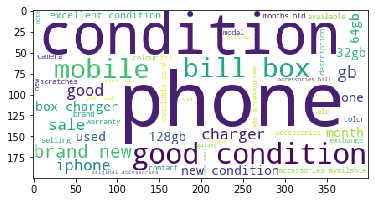

In [128]:
wl = WordCloud(background_color = 'white' ,min_font_size = 4 , margin = 2 ,ranks_only = None 
               ,normalize_plurals = True  ,max_words = 50 , stopwords =  set(STOPWORDS ), random_state = 42)
wl.generate(' '.join(test['Additional_Description']))
plt.imshow(wl)

##  Some Infors from the abvove WordCloud Images

 - Most of the items  maybe be phones as indicated by the its numerours occurrence
 - the conditions of the electronics also mattered most
             - This maybe either new   as shown by new keyword .
             - Good conditions as showned above
             - Storage space .. showed by **__gb size**
 - More are there to be included.
 
 
##  Insight from above
 - Thsi insights may play an important role in price determination.
 - Hence I will therefore ....
         - **Get the gb size for each row .. if it has more than one i will add them.**
         - **Get if a phone is new and add 1 to it else 0**
         - **Get if a phone is good and add 1 to it else 0**
         - **If a it was a phoen add 1 else 0.**
 - I will add columns regrading this insights.

In [14]:
train.shape

(2326, 7)

In [15]:
sub.shape

(997, 1)

In [16]:
test.shape

(997, 6)

In [17]:
train.isnull().sum()

Brand                     0
Model_Info                0
Additional_Description    0
Locality                  0
City                      0
State                     0
Price                     0
dtype: int64

In [18]:
test.isnull().sum()

Brand                     0
Model_Info                0
Additional_Description    0
Locality                  0
City                      0
State                     0
dtype: int64

In [19]:
#lets concat the data files..
# gonna assign -1 to price column in the test file for differentiuation purposes
test['Price'] = -1

In [20]:
test.tail()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
992,1,name0 7 32gb sale accessories,wife upgrading mobile 10100000 x 101009600 sp...,796,4,0,-1
993,1,name233 8 pro 6gb ram 128gb rom 1year old mobile,101004800 1010036800 1 month 12 days old 1010...,145,17,7,-1
994,0,name233 name2815 6 gb ram 128 gb rom blue 3 m...,10100105200 leeco 1010018400 10100221100 1010...,352,13,5,-1
995,1,name269 phone 6,phone best condition 101006600 device selling...,350,4,0,-1
996,1,name0 7 red 128 gb,1010023300 9 10100148200 good condition compl...,602,11,4,-1


In [129]:
#merge the data
df = pd.concat([train , test] , axis = 0).reset_index(drop = True)

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [22]:
df.shape

(3323, 7)

In [23]:
df.isnull().sum()

Brand                     0
Model_Info                0
Additional_Description    0
Locality                  0
City                      0
State                     0
Price                     0
dtype: int64

## Getting into some small analysis

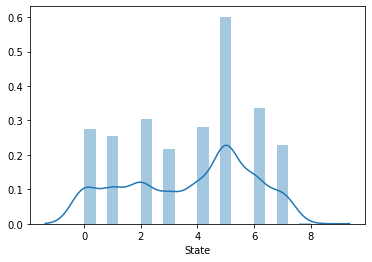

In [24]:
sns.distplot(df.State , vertical = False)

### State with label number 5 maybe have been the greatest contributer
 - The others had alsmost same contribution to the purchases with state label 3 with lowest

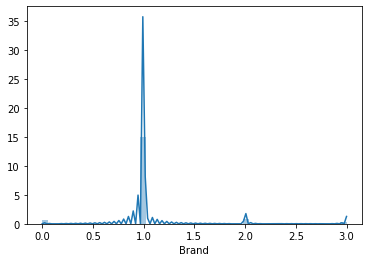

In [25]:
sns.distplot(df.Brand , vertical = False)

## The most commodity bought was that with Brand labeled 1

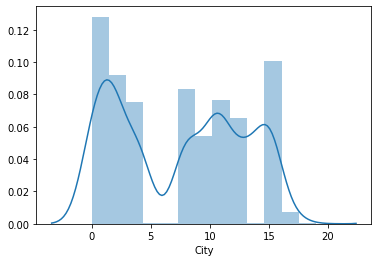

In [26]:
sns.distplot(df.City , vertical = False)

##  City with label 0 has the highest

In [131]:
##checking unique values in some cols

In [132]:
df.Brand.unique()

array([1, 2, 0, 3])

In [133]:
df.City.nunique()

20

In [29]:
df.State.nunique()

9

In [30]:
df.Locality.nunique()

1192

## From the above i will encode using dummies Brand , City , State.
 - this is because they are almost same occurences encoded

In [31]:
#lets create encode  Brand , City and State

In [32]:
df = pd.get_dummies(df, columns = ['Brand', 'City', 'State'])

In [33]:
df.head()

,Model_Info,Additional_Description,Locality,Price,Brand_0,Brand_1,Brand_2,Brand_3,City_0,City_1,...,City_19,State_0,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8
0,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,15000,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,18800,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,50000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,16500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,26499,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Here Since Model_Info , Additionation Description Plays a bigger role in price description 
 - I will vectorize them and create a df from the vectorized values
 - I'm Gonna used Model_Info only due to size and computation power cuurently..
 - You can used Additional Description if you can

In [34]:
#create a countv ectorizer

vec = TfidfVectorizer(tokenizer = TreebankWordTokenizer().tokenize , lowercase = True)
vec_df = vec.fit_transform(df['Model_Info']).todense()
# create a df from the vectorized data

new_vec_df = pd.DataFrame(vec_df)

# rename the columns of the vectorized columns
new_vec_df.columns = ["Model_Info_" + str(x) for x in new_vec_df.columns]

In [35]:
#precheck
new_vec_df.tail(2)

,Model_Info_0,Model_Info_1,Model_Info_2,Model_Info_3,Model_Info_4,Model_Info_5,Model_Info_6,Model_Info_7,Model_Info_8,Model_Info_9,...,Model_Info_1639,Model_Info_1640,Model_Info_1641,Model_Info_1642,Model_Info_1643,Model_Info_1644,Model_Info_1645,Model_Info_1646,Model_Info_1647,Model_Info_1648
3321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#lets concat with our df now // add to previous df
df = pd.concat([df , new_vec_df ] , axis =1)

In [37]:
df.head(1)

,Model_Info,Additional_Description,Locality,Price,Brand_0,Brand_1,Brand_2,Brand_3,City_0,City_1,...,Model_Info_1639,Model_Info_1640,Model_Info_1641,Model_Info_1642,Model_Info_1643,Model_Info_1644,Model_Info_1645,Model_Info_1646,Model_Info_1647,Model_Info_1648
0,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,15000,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## From Above ...Concerning the wordcloud..
## Here is the functions implimentation on the insights

In [38]:
#ltes find how many gb the device have

import re
def find_gbs(data):
    gb_search = re.findall('[0-9]+(?=\s*gb)' , data)
#     check if results availabel
    if gb_search == 0:
        return 0
    else:
#         return the first values
        if len(gb_search) == 0:
            value = 0
        else:
            value  = 0
            for x in gb_search:
                value = value + int(x)
        return value

In [ ]:
#we gonna check gb availaily to model infor and  additional description
#create the two cols
df["model_gb"] = df["Model_Info"].apply(lambda v: find_gbs(v))
df["desc_gb"] = df["Additional_Description"].apply(lambda v: find_gbs(v))

In [39]:
#checking if the device isa phone or not

import re
def phone(data):
    p = re.findall(r'phone' , data)
    if len(p) == 0:
        return 0
    else:
        return 1

In [40]:
#apply the phone function to create the new columns

df["model_is_phone"] = df["Model_Info"].apply(lambda v: phone(v))
df["desc_is_phone"] = df["Additional_Description"].apply(lambda v: phone(v))

In [41]:
#check if its a new phoen

import re
def is_new(data):
#     pattern = ["new" , "good"]
    p = re.findall(r"new" , data )
    if len(p) == 0:
        return 0
    else:
        return 1

In [42]:
# create cols for the function is_new()
df["model_is_new"] = df["Model_Info"].apply(lambda v: is_new(v))
df["desc_is_new"] = df["Additional_Description"].apply(lambda v: is_new(v))

In [43]:
# checking if the device is in a good condition
import re
def is_good(data):
#     pattern = ["new" , "good"]
    p = re.findall(r"good" , data )
    if len(p) == 0:
        return 0
    else:
        return 1

In [44]:
#apply the function and create the cols
df["model_is_good"] = df["Model_Info"].apply(lambda v: is_good(v))
df["desc_is_good"] = df["Additional_Description"].apply(lambda v: is_good(v))

In [46]:
df.model_gb.head(10)

0     64
1      0
2    256
3     64
4      0
5    128
6      0
7     35
8    732
9    128
Name: model_gb, dtype: int64

In [47]:
#get back our train  and test sets.. by slicing
train , test = df[:train.shape[0]].reset_index(drop=True) , df[train.shape[0]:].reset_index(drop = True)

In [48]:
train.shape

(2326, 1694)

In [49]:
test.shape

(997, 1694)

In [50]:
#drop price column since its the value we are looking
test.drop('Price' , inplace =True , axis = 1)
test.head(1)

,Model_Info,Additional_Description,Locality,Brand_0,Brand_1,Brand_2,Brand_3,City_0,City_1,City_2,...,Model_Info_1647,Model_Info_1648,model_is_phone,desc_is_phone,model_is_new,desc_is_new,model_is_good,desc_is_good,model_gb,desc_gb
0,name0 55s66s66s778xxsxsmax etc,good condition 11months old single scratch we...,570,0,1,0,0,0,0,0,...,0.0,0.0,0,1,0,0,0,1,0,0


In [51]:
#lets get the training fuatures..
#we will drop City 'Model_Info', 'Additional_Description',  'Brand',  'State'

In [52]:
label = train.Price

In [53]:
train.drop(['Model_Info', 'Additional_Description', 'Price'] , axis = 1 , inplace = True)

In [54]:
test.drop(['Model_Info', 'Additional_Description'] , axis = 1 , inplace = True)

In [55]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
import time
from sklearn.metrics import mean_squared_error as mse

In [56]:
def rmse(y_true, y_pred):
    return mse(y_true, y_pred) ** 0.5

## Modellling part .
 - I will use KFold for cross Validation.
 - I will apply three algoriths i.e
             -XGBRegressor
             -LGBMRegressor
             -CatBoostRegressor
 - I will then check the models which perfoms better by comparison
 - I wil do logs for the label and as antilog for the preds in order for proper working.standardize the labels

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:

# !pip install lightgbm
import sys
sys.path.append('/usr/local/lib/python3.7/dist-packages')
from lightgbm import LGBMRegressor

In [59]:
kfolds  = KFold(n_splits=10,shuffle = False, random_state=101)
# lgb = LGBMRegressor()
# scores = cross_val_score(lgb , train , label ,cv = kfolds , scoring = 'neg_mean_squared_error')

In [69]:
import time
begin_time =time.time()
#lists to keep our scores
train_score = []
test_score = []

#iterate through the kfolds while training and predicting
for x_train , x_test in kfolds.split(train):
    fold_begin_time = time.time()
    X_train , X_test = train.iloc[x_train] , train.iloc[x_test]
    y_train , y_test = label.iloc[x_train] , label.iloc[x_test]
    
    
#     initialize the classifier
    lgb = LGBMRegressor(n_estimators=1500, learning_rate=0.05, max_depth=7)
    
#     fit
    lgb.fit(X_train , np.log(y_train) , eval_set=[(X_test , np.log(y_test))] , verbose = 100 , early_stopping_rounds = 200 , eval_metric = 'rmse')
    
    #test using the test set.
    test_pred = np.exp(lgb.predict(X_test))
    train_preds = np.exp(lgb.predict(X_train))
#     append the results
    train_score.append(rmse(np.log(y_train) , np.log(train_preds)))
    test_score.append(rmse(np.log(y_test) , np.log(test_pred)))
#     prind the scores
    print(f'RMSE FOR Train this FOLD IS >>   {rmse(np.log(y_train) , np.log(train_preds))}\n')
    print(f'RMSE FOR THSI FOLD IS >>   {rmse(np.log(y_test) , np.log(test_pred))}\n')
    
    fold_end_time = time.time()
    fold_time =int(fold_end_time - fold_begin_time)
    print(f"Takes    {(fold_time)//60} minutes {(fold_time)%60} seconds  to complete\n")
    
print("\n\n")
train_time = int(time.time()  - begin_time)
print(f"Training time is {(train_time)//60} minutes {(train_time)%60} seconds ")


# check final score
print(f"Avearge Train Score is {np.mean(train_score)}\n")
print(f"Average Test Score is  {np.mean(test_score)}\n")

Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 0.436155	valid_0's l2: 0.190231
[200]	valid_0's rmse: 0.430737	valid_0's l2: 0.185534
[300]	valid_0's rmse: 0.432086	valid_0's l2: 0.186698
Early stopping, best iteration is:
[192]	valid_0's rmse: 0.430281	valid_0's l2: 0.185141
RMSE FOR Train this FOLD IS >>   0.39552641447909676

RMSE FOR THSI FOLD IS >>   0.430280682955791

Takes    0 minutes 8 seconds  to complete

Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 0.482534	valid_0's l2: 0.232839
[200]	valid_0's rmse: 0.47491	valid_0's l2: 0.22554
[300]	valid_0's rmse: 0.470756	valid_0's l2: 0.221612
[400]	valid_0's rmse: 0.469735	valid_0's l2: 0.220651
[500]	valid_0's rmse: 0.467304	valid_0's l2: 0.218373
[600]	valid_0's rmse: 0.466912	valid_0's l2: 0.218007
[700]	valid_0's rmse: 0.467123	valid_0's l2: 0.218204
[800]	valid_0's rmse: 0.467189	valid_0's l2: 0.218266
[900]	valid_0's rmse: 0.467712	valid_0's l2: 0.21875

In [60]:
from xgboost import XGBRegressor
import time
begin_time =time.time()
train_score = []
test_score = []
for x_train , x_test in kfolds.split(train):
    fold_begin_time = time.time()
    X_train , X_test = train.iloc[x_train] , train.iloc[x_test]
    y_train , y_test = label.iloc[x_train] , label.iloc[x_test]
    
    
#     initialize the classifier
    xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6)
    
#     fit
    xgb.fit(X_train , np.log(y_train) , eval_set=[(X_test , np.log(y_test))] , verbose = 100 , early_stopping_rounds = 200 , eval_metric = 'rmse')
    
    #test using the test set.
    test_pred_xgb = np.exp(xgb.predict(X_test))
    train_preds = np.exp(xgb.predict(X_train))
    train_score.append(rmse(np.log(y_train) , np.log(train_preds)))
    test_score.append(rmse(np.log(y_test) , np.log(test_pred_xgb)))
    print(f'RMSE FOR Train this FOLD IS >>   {rmse(np.log(y_train) , np.log(train_preds))}\n')
    print(f'RMSE FOR THSI FOLD IS >>   {rmse(np.log(y_test) , np.log(test_pred_xgb))}\n')
    fold_end_time = time.time()
    fold_time =int(fold_end_time - fold_begin_time)
    print(f"Takes    {(fold_time)//60} minutes {(fold_time)%60} seconds  to complete\n")
    
print("\n\n")
train_time = int(time.time()  - begin_time)
print(f"Training time is {(train_time)//60} minutes {(train_time)%60} seconds ")


print(f"Avearge Train Score is {np.mean(train_score)}\n")
print(f"Average Test Score is  {np.mean(test_score)}\n")

[0]	validation_0-rmse:8.91002
Will train until validation_0-rmse hasn't improved in 200 rounds.
[100]	validation_0-rmse:0.43646
[199]	validation_0-rmse:0.43171
RMSE FOR Train this FOLD IS >>   0.3214210959911206

RMSE FOR THSI FOLD IS >>   0.4315382083197018

Takes    0 minutes 43 seconds  to complete

[0]	validation_0-rmse:8.85529
Will train until validation_0-rmse hasn't improved in 200 rounds.
[100]	validation_0-rmse:0.47871
[199]	validation_0-rmse:0.46982
RMSE FOR Train this FOLD IS >>   0.3193721849182684

RMSE FOR THSI FOLD IS >>   0.4698216758743178

Takes    0 minutes 41 seconds  to complete

[0]	validation_0-rmse:8.85656
Will train until validation_0-rmse hasn't improved in 200 rounds.
[100]	validation_0-rmse:0.46391
[199]	validation_0-rmse:0.45161
RMSE FOR Train this FOLD IS >>   0.32514058200058166

RMSE FOR THSI FOLD IS >>   0.4516130057600638

Takes    0 minutes 41 seconds  to complete

[0]	validation_0-rmse:8.89240
Will train until validation_0-rmse hasn't improved in 200

In [61]:
#for catboost
from catboost import CatBoostRegressor
import time
begin_time =time.time()
train_score = []
test_score = []
for x_train , x_test in kfolds.split(train):
    fold_begin_time = time.time()
    X_train , X_test = train.iloc[x_train] , train.iloc[x_test]
    y_train , y_test = label.iloc[x_train] , label.iloc[x_test]
    
    
#     initialize the classifier
    cat = CatBoostRegressor(n_estimators=500, learning_rate=0.005, max_depth=11)
    
#     fit
    cat.fit(X_train , np.log(y_train) , eval_set=[(X_test ,np.log(y_test))] , verbose = 100 , early_stopping_rounds = 200 )
    
    #test using the test set.
    test_pred_cat = np.exp(cat.predict(X_test))
    train_preds = np.exp(cat.predict(X_train))
    train_score.append(rmse(np.log(y_train) , np.log(train_preds)))
    test_score.append(rmse(np.log(y_test) , np.log(test_pred_cat)))
    print(f'RMSE FOR Train this FOLD IS >>   {rmse(np.log(y_train) , np.log(train_preds))}\n')
    print(f'RMSE FOR THSI FOLD IS >>   {rmse(np.log(y_test) , np.log(test_pred_cat))}\n')
    fold_end_time = time.time()
    fold_time =int(fold_end_time - fold_begin_time)
    print(f"Takes    {(fold_time)//60} minutes {(fold_time)%60} seconds  to complete\n")
    
print("\n\n")
train_time = int(time.time()  - begin_time)
print(f"Training time is {(train_time)//60} minutes {(train_time)%60} seconds ")

print(f"Avearge Train Score is {np.mean(train_score)}\n")
print(f"Average Test Score is  {np.mean(test_score)}\n")

0:	learn: 0.8395030	test: 0.8025907	best: 0.8025907 (0)	total: 446ms	remaining: 3m 42s
100:	learn: 0.6914212	test: 0.6637313	best: 0.6637313 (100)	total: 32.5s	remaining: 2m 8s
200:	learn: 0.6036338	test: 0.5818032	best: 0.5818032 (200)	total: 1m 5s	remaining: 1m 37s
300:	learn: 0.5492562	test: 0.5325072	best: 0.5325072 (300)	total: 1m 37s	remaining: 1m 4s
400:	learn: 0.5164511	test: 0.5047146	best: 0.5047146 (400)	total: 2m 10s	remaining: 32.2s
499:	learn: 0.4982999	test: 0.4917985	best: 0.4917985 (499)	total: 2m 42s	remaining: 0us

bestTest = 0.4917985278
bestIteration = 499

RMSE FOR Train this FOLD IS >>   0.49829992908665977

RMSE FOR THSI FOLD IS >>   0.49179854699477943

Takes    2 minutes 44 seconds  to complete

0:	learn: 0.8343652	test: 0.8486368	best: 0.8486368 (0)	total: 10.8s	remaining: 1h 29m 26s
100:	learn: 0.6854104	test: 0.7138324	best: 0.7138324 (100)	total: 43.8s	remaining: 2m 53s
200:	learn: 0.5981982	test: 0.6337785	best: 0.6337785 (200)	total: 1m 16s	remaining: 1m

## For our prediction we will combine the three models .xgb , cat and lgb
- xgb will take 0.6 contribution

- lgb will take o.3 of contribution
- cat will take 0.1 of the contrib

 - This is based on test i have perfomed.
 - The above combination seems to minimize the rmse

In [70]:
#predictions using test set..
#  NOTE ... The results are in log format
cat_preds = cat.predict(test)
xgb_preds = xgb.predict(test)
lgb_preds = lgb.predict(test)

# for checking perfomance.. predicts using train set
cat_train_preds = cat.predict(train)
xgb_train_preds = xgb.predict(train)
lgb_train_preds = lgb.predict(train)

In [134]:
# let now use the distribution above to predict final..
# for test using training score first

final_train_preds = xgb_train_preds*0.6+lgb_train_preds*0.3+0.1*cat_train_preds

In [135]:
# checking training score rmse
print(f"Final Training score is rmse     {rmse(np.log(label) , final_train_preds)}")

Final Training score is rmse     0.3620192646428179


### The model has Improved greatly.. from 0.40 plus...
 - This is the combination i will used for the final results

In [97]:
# Thats our best model...we can create a submission file using it then
final_test_sub = xgb_preds*0.6 + lgb_preds*0.3 + cat_preds*0.1

# convert back to normal numbers
sub_test = np.exp(final_test_sub)

In [100]:
len(sub_test)

997

In [101]:
sub.shape[0]

997

In [103]:
sub["Price"] = sub_test

In [105]:
# save.
sub.to_csv("final_sub.csv" , index = False)

In [106]:
x = pd.read_csv('final_sub.csv')

In [107]:
x.head()

,Price
0,14652.086943
1,8360.463049
2,14039.180301
3,43092.835285
4,7940.869190


 ## Gonna Create files containing the models for future usage.
  - I will use joblib module and save the 3 models

In [115]:
# save the model for future usage..
import joblib
cat_name  = "cat_model.pkl"
lgb_name  = "lgb_model.pkl"
xgb_name  = "xgb_model.pkl"

joblib.dump(cat , cat_name)
joblib.dump(lgb , lgb_name)
joblib.dump(xgb , xgb_name)


['xgb_model.pkl']

In [116]:
# reusing the saved models ..
cat_pkl = joblib.load(cat_name)

In [117]:
cat_pkl

&copy; Stephen Kamau